In [37]:
#step no 1 data cleaning.

# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [38]:
# read the data set

data = pd.read_excel("Coffee Shop Sales.xlsx")

In [39]:
# see the first 5 rows
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [40]:
# see the number of rows and columns
data.shape

(149116, 11)

In [41]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [42]:
# Fill or drop missing values as needed
data = data.dropna() 

In [43]:
# see quick info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [44]:
# Check for duplicates
print("\nDuplicate Rows:")
print(data.duplicated().sum())


Duplicate Rows:
0


In [45]:
# Remove duplicates
data = data.drop_duplicates()

In [46]:
# Convert date columns to datetime format if needed
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

In [47]:
# Standardize string columns (e.g., trimming whitespace, converting to lower/upper case)
data['store_location'] = data['store_location'].str.strip().str.lower()
data['product_category'] = data['product_category'].str.strip().str.lower()
data['product_type'] = data['product_type'].str.strip().str.lower()
data['product_detail'] = data['product_detail'].str.strip().str.lower()

In [48]:
# Ensure correct data types
data['transaction_qty'] = data['transaction_qty'].astype(int)
data['unit_price'] = data['unit_price'].astype(float)

In [49]:
# Display cleaned data
print("\nCleaned Data Preview:")
print(data.head())


Cleaned Data Preview:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  lower manhattan          32         3.0              coffee   
1         5  lower manhattan          57         3.1                 tea   
2         5  lower manhattan          59         4.5  drinking chocolate   
3         5  lower manhattan          22         2.0              coffee   
4         5  lower manhattan          57         3.1                 tea   

            product_type               product_detail  
0  gourmet brewed coffee       

In [50]:
# Save cleaned data
cleaned_file_path = 'cleaned_dataset.csv'
data.to_csv(cleaned_file_path, index=False)

print(f"\nCleaned data saved to {'cleaned_dataset.csv'}")


Cleaned data saved to cleaned_dataset.csv


In [51]:
#Step 2: Profit/Loss Analysis

#Load the cleaned dataset.
cleaned_file_path = 'cleaned_dataset.csv'
data = pd.read_csv(cleaned_file_path)

In [52]:
# Display data preview
print("Cleaned Data Preview:")
print(data.head())

Cleaned Data Preview:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  lower manhattan          32         3.0              coffee   
1         5  lower manhattan          57         3.1                 tea   
2         5  lower manhattan          59         4.5  drinking chocolate   
3         5  lower manhattan          22         2.0              coffee   
4         5  lower manhattan          57         3.1                 tea   

            product_type               product_detail  
0  gourmet brewed coffee        

In [53]:
# Calculate total sales for each transaction
data['total_sales'] = data['transaction_qty'] * data['unit_price']

In [54]:
# Assuming 70% of sales is the cost
data['cost'] = data['total_sales'] * 0.7

In [55]:
# Calculate profit for each transaction
data['profit'] = data['total_sales'] - data['cost']

In [56]:
# Display data with calculated columns
print("\nData with Total Sales and Profit:")
print(data.head())


Data with Total Sales and Profit:
   transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01         07:06:11                2   
1               2       2023-01-01         07:08:56                2   
2               3       2023-01-01         07:14:04                2   
3               4       2023-01-01         07:20:24                1   
4               5       2023-01-01         07:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  lower manhattan          32         3.0              coffee   
1         5  lower manhattan          57         3.1                 tea   
2         5  lower manhattan          59         4.5  drinking chocolate   
3         5  lower manhattan          22         2.0              coffee   
4         5  lower manhattan          57         3.1                 tea   

            product_type               product_detail  total_sales  cost  \

In [57]:
# Aggregate total sales by product
product_sales = data.groupby('product_id')['total_sales'].sum().reset_index()

In [58]:
# Display aggregated sales data
print("\nAggregated Sales Data by Product:")
print(product_sales.head())


Aggregated Sales Data by Product:
   product_id  total_sales
0           1      3852.00
1           2      3294.00
2           3      2492.75
3           4      3067.50
4           5      2220.00


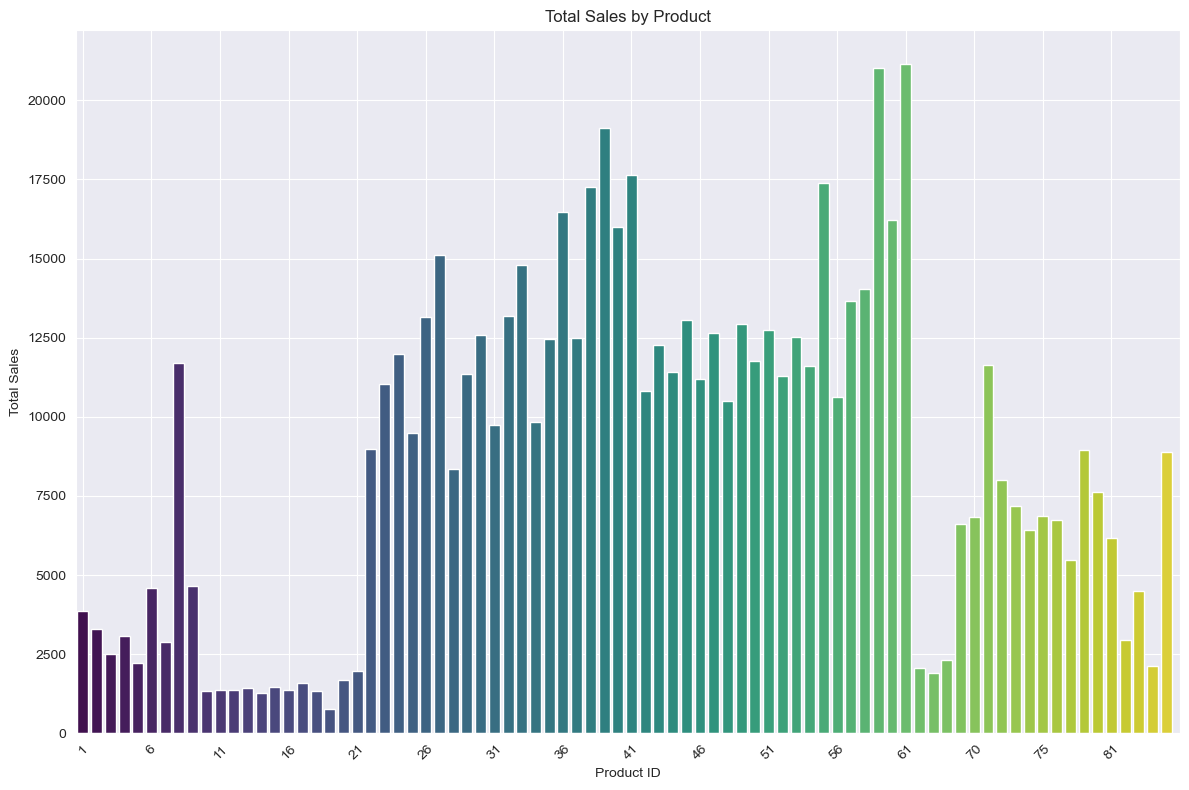

In [59]:
#Graphical Representations to Compare Product Sales
# Plot product sales
plt.figure(figsize=(12, 8))
sns.barplot(x='product_id', y='total_sales', data=product_sales, palette='viridis')
plt.title('Total Sales by Product')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, fontsize=10)
plt.xticks(range(0, len(product_sales) + 1, 5))  # Show every 5th product ID for readability
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
# Aggregate profit by product
profit_margins = data.groupby('product_id')['profit'].sum().reset_index()

# Identify profitable and loss-making products
profit_margins['category'] = profit_margins['profit'].apply(lambda x: 'Profit' if x > 0 else 'Loss')

# Display profit margins data
print("\nProfit Margins by Product:")
print(profit_margins.head())



Profit Margins by Product:
   product_id    profit category
0           1  1155.600   Profit
1           2   988.200   Profit
2           3   747.825   Profit
3           4   920.250   Profit
4           5   666.000   Profit


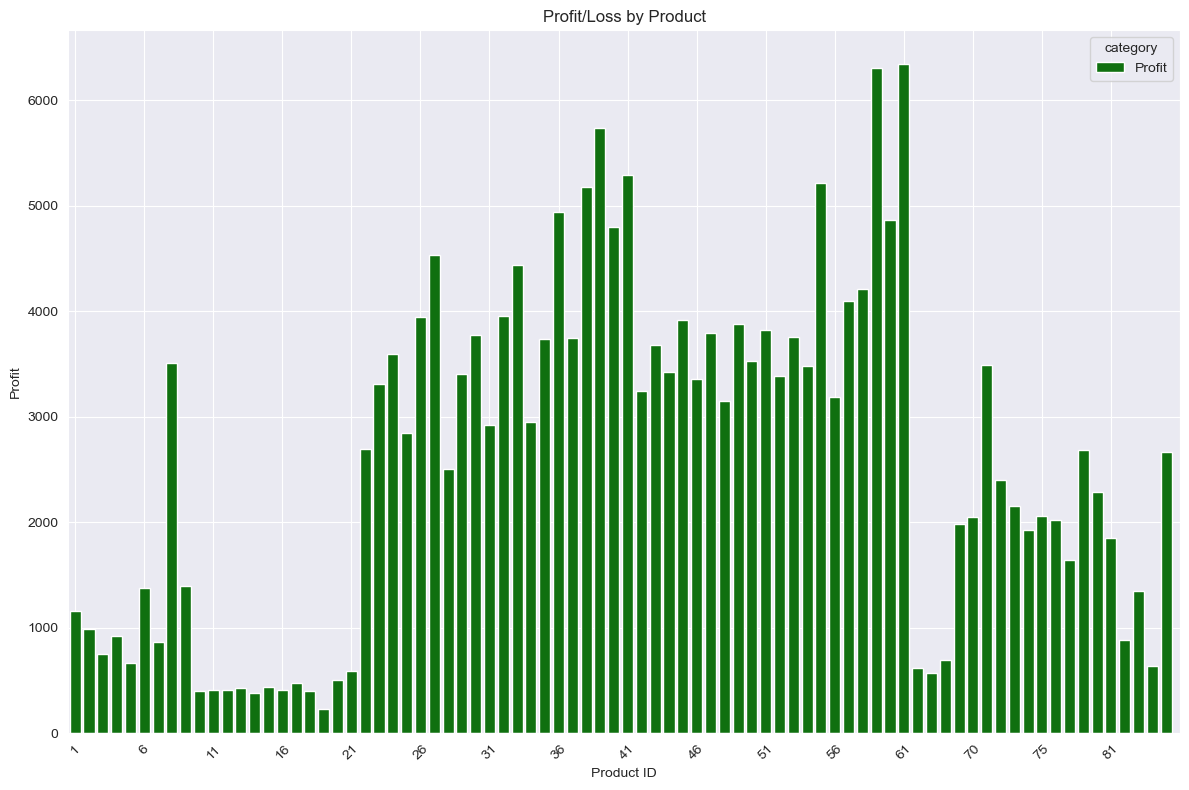

In [61]:
# Plot profit margins
plt.figure(figsize=(12, 8))
sns.barplot(x='product_id', y='profit', hue='category', data=profit_margins, palette={'Profit': 'green', 'Loss': 'red'})
plt.title('Profit/Loss by Product')
plt.xlabel('Product ID')
plt.ylabel('Profit')
plt.xticks(rotation=45, fontsize=10)
plt.xticks(range(0, len(profit_margins) + 1, 5))
plt.grid(True)
plt.tight_layout()
plt.show()

In [62]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [63]:
# Feature selection and target variable
features = data[['transaction_qty', 'unit_price', 'store_id', 'product_category', 'product_type']]  # Adjust features as needed
target = data['profit'] 



In [64]:
# Encode variables
features = pd.get_dummies(features, drop_first=True)

In [65]:
# Splitdata into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [66]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [67]:
# Predict future profits
y_pred = model.predict(X_test)

In [68]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Model Evaluation:
Mean Absolute Error: 0.13190300961727744
R^2 Score: 0.9295489485772521


In [69]:
# Recommendations based on model outcomes
important_factors = pd.Series(model.coef_, index=features.columns).sort_values(ascending=False)
print("\nFactors Contributing to Profitability:")
print(important_factors)


Factors Contributing to Profitability:
product_type_hot chocolate             5.106324e+10
product_type_biscotti                  4.268748e+10
product_type_scone                     4.268748e+10
product_category_coffee                4.268748e+10
product_type_pastry                    4.268748e+10
product_category_branded               3.915559e+10
product_category_coffee beans          3.795299e+10
product_category_loose tea             3.417958e+10
product_type_brewed green tea          3.383708e+10
product_type_brewed chai tea           3.383708e+10
product_type_brewed herbal tea         3.383708e+10
product_type_brewed black tea          3.383708e+10
product_type_regular syrup             3.159380e+10
product_type_sugar free syrup          3.159380e+10
product_category_packaged chocolate    3.045303e+10
product_type_organic chocolate         1.223444e+10
product_type_drinking chocolate        1.223444e+10
product_category_flavours              1.109368e+10
product_category_tea    

In [70]:
# Identify products that contribute most to profit increase
product_contributions = data.groupby('product_type')['profit'].mean().sort_values(ascending=False).head(1)
print("\nProduct Type Contributing Most to Profit:")
print(product_contributions)


Product Type Contributing Most to Profit:
product_type
premium beans    13.020982
Name: profit, dtype: float64


In [72]:
# Step 4: Loss Mitigation

# Investigate loss-making products
loss_products = profit_margins[profit_margins['category'] == 'Loss']
print("\nLoss-making Products:")
print(loss_products)


Loss-making Products:
Empty DataFrame
Columns: [product_id, profit, category]
Index: []


In [75]:
# Check if there are any loss-making products
if loss_products.empty:
    print("No loss-making products found.")
else:
    # Analyze factors contributing to losses
    loss_analysis = data[data['product_id'].isin(loss_products['product_id'])]
    
    # Provide actionable steps to minimize losses
    # Example: Analyze and print cost reduction suggestions
    cost_reduction_suggestions = loss_analysis.groupby('product_id')['cost'].mean().sort_values()
    print("\nCost Reduction Suggestions:")
    print(cost_reduction_suggestions)
    
    # Further recommendations based on the analysis
    # Example: List products for potential discontinuation
    threshold = -1000  # Define a loss threshold
    persistent_loss_products = loss_products[loss_products['profit'] < threshold]
    print("\nProducts for Potential Discontinuation:")
    print(persistent_loss_products['product_id'].tolist())
    
    # Example: Recommend price adjustments to minimize losses
    # (Assuming 'unit_price' and 'transaction_qty' columns exist in the dataset)
    price_adjustments = loss_analysis.groupby('product_id').apply(lambda x: (x['unit_price'].mean(), x['transaction_qty'].sum()))
    print("\nPrice Adjustments Recommendations:")
    print(price_adjustments)

# Adjust the threshold to see if there are any products close to breaking even
alternative_threshold = 0  # Products with no profit or slight loss
near_loss_products = profit_margins[(profit_margins['profit'] <= alternative_threshold) & (profit_margins['profit'] > threshold)]
print("\nProducts Near Breaking Even (Alternative Threshold):")
print(near_loss_products)

if not near_loss_products.empty:
    near_loss_analysis = data[data['product_id'].isin(near_loss_products['product_id'])]
    
    # Provide cost reduction suggestions for these products
    alternative_cost_reduction_suggestions = near_loss_analysis.groupby('product_id')['cost'].mean().sort_values()
    print("\nAlternative Cost Reduction Suggestions:")
    print(alternative_cost_reduction_suggestions)
    
    # List these products for potential cost-saving measures
    print("\nProducts for Potential Cost-Saving Measures:")
    print(near_loss_products['product_id'].tolist())

No loss-making products found.

Products Near Breaking Even (Alternative Threshold):
Empty DataFrame
Columns: [product_id, profit, category]
Index: []
